In [94]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time


iris = datasets.load_iris()
X = iris.data[:, 2:]  
y = iris.target  


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  

In [95]:
k = len(set(y))  
m = X_train.shape[0]  
n = X_train.shape[1]  
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [96]:
class LogisticRegression:
    
    
    def __init__(self, k, n , method = "batch", W =  0.001, alpha=0.001, max_iter=10000 ,loss_old=10000, tol=1e-5):
        self.k = k
        self.n = n
        self.method = method
        self.W = W
        self.alpha = alpha
        self.max_iter = max_iter
        self.loss_old = loss_old
        self.tol = tol
       

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        iter_stop = 0
        list_of_used_ix = []
        self.cost = []
        
      
        if self.method == "batch":
            start = time.time()
            self.W = np.random.rand(n, k)
            l_rate = 0.01
            for i in range(self.max_iter):
                cost, grad =  self.gradient(X, y, self.W)
                #print(cost)
                self.cost.append(cost)
                #print(cost)
                if i % 500 == 0:
                    print("Cost at {} iteration {}".format(i,cost))
                self.W = self.W - l_rate * grad
            return self.W, i
            time_taken = time.time() - start
            print(time_taken)
         
        
        
        elif self.method == "sto":
            start = time.time()
            #print(self.max_iter)
            for i in range(self.max_iter):
                i = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    i = np.random.randint(X.shape[0])
                X_train = X[i, :].reshape(1, -1)
                y_train = y[i]
                cost, grad = self.gradient(X_train, y_train,self.W)
                self.cost.append(cost)
                if i % 500 == 0:
                    print("Cost at {} iteration {}".format(i,cost))
                self.W = self.W - self.alpha * grad
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
            time_taken = time.time() - start
            print(time_taken)
              
               
        elif self.method == "minibatch":
            start = time.time()  
            self.W = np.zeros(X.shape[1])
            l_rate = 0.01
            self.cost = []
            #10% of data
            batch_size = int(0.1 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) 
                batch_X = X[ix:ix+batch_size]
                batch_y = y[ix:ix+batch_size]
                cost, grad = self.gradient(batch_X, batch_y, self.W)
                self.cost.append(cost)
                if i % 500 == 0:
                    print("Cost at {} iteration {}".format(i,cost))
                self.W = self.W - self.alpha * grad
                #return self.W, i
            time_taken = time.time() - start
            print(time_taken)
            
        else:
            raise ValueError()



    def gradient(self,X, y, W):
        m = X.shape[0]
        self.W = np.random.rand(n, k)
        h = self.h_theta(X, self.W)
        error = h - y
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad 
    
    def softmax(self,theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self,X, error):
        return  X.T @ error
        
    def h_theta(self,X, W):
        return self.softmax(X @ self.W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W),axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.cost)) , self.cost , label = "Train Losses")
        plt.title("loss")
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.legend()
        
    

Cost at 0 iteration 199.96550964322785
Cost at 500 iteration 262.41359726651797
Cost at 1000 iteration 222.46744128808717
Cost at 1500 iteration 220.0706307979814
Cost at 2000 iteration 213.48279805542626
Cost at 2500 iteration 250.61586043740343
Cost at 3000 iteration 213.51757276738047
Cost at 3500 iteration 189.50560026489435
Cost at 4000 iteration 212.4368691278271
Cost at 4500 iteration 221.52020207587873
Cost at 5000 iteration 249.14194218703602
Cost at 5500 iteration 214.08768802910686
Cost at 6000 iteration 176.2817105385577
Cost at 6500 iteration 261.6788895504966
Cost at 7000 iteration 200.65443232865647
Cost at 7500 iteration 278.3472087806281
Cost at 8000 iteration 199.7824749279149
Cost at 8500 iteration 207.70107063003692
Cost at 9000 iteration 193.49167579114285
Cost at 9500 iteration 201.06888370153382
None
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.36      0.56      0.43         9
  

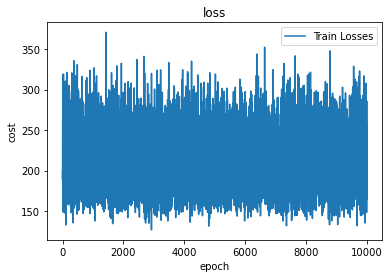

In [97]:
model = LogisticRegression(k,X_train.shape[1], "batch")
#model = LogisticRegression()
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
print(model.plot())

print(classification_report(y_test, yhat))

Cost at 0 iteration 1.2702935162854643
Cost at 0 iteration 2.520024469996882
Cost at 0 iteration 2.637334817752036
Cost at 0 iteration 1.588828318522273
Cost at 0 iteration 2.3351005364460753
Cost at 0 iteration 2.6686985565807424
Cost at 0 iteration 2.18483448877069
Cost at 0 iteration 1.6591653090619274
Cost at 0 iteration 2.116341656161241
Cost at 0 iteration 1.6077820688975994
Cost at 0 iteration 2.8751455921875144
Cost at 0 iteration 2.6096328393912245
Cost at 0 iteration 1.5430838462242864
Cost at 0 iteration 2.815572561671169
Cost at 0 iteration 2.8388043506378917
Cost at 0 iteration 2.43401061808157
Cost at 0 iteration 2.0669005492224723
Cost at 0 iteration 2.96111446669838
Cost at 0 iteration 1.7949051748126266
Cost at 0 iteration 1.9713941500468797
Cost at 0 iteration 2.059850521104023
Cost at 0 iteration 2.052961812725205
Cost at 0 iteration 1.2223625930077797
Cost at 0 iteration 1.8426677976096182
Cost at 0 iteration 1.208750806877104
Cost at 0 iteration 2.2069046375521792


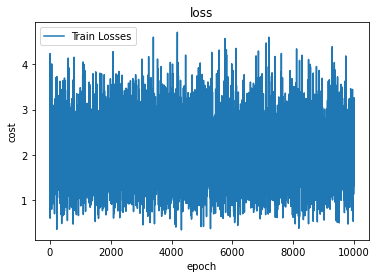

In [98]:
model = LogisticRegression(k,X_train.shape[1], "sto")
#model = LogisticRegression()
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
print(model.plot())

print(classification_report(y_test, yhat))

Cost at 0 iteration 22.79692433626891
Cost at 500 iteration 15.91686507158989
Cost at 1000 iteration 17.801733884948867
Cost at 1500 iteration 16.850324917291296
Cost at 2000 iteration 17.34403835066561
Cost at 2500 iteration 19.98103321318031
Cost at 3000 iteration 20.351357748209942
Cost at 3500 iteration 26.835991562876576
Cost at 4000 iteration 19.375201947815263
Cost at 4500 iteration 16.32001183862033
Cost at 5000 iteration 4.225159682628061
Cost at 5500 iteration 23.510710165893467
Cost at 6000 iteration 14.932160826218045
Cost at 6500 iteration 25.162100308512073
Cost at 7000 iteration 19.102473979716684
Cost at 7500 iteration 18.69928266330021
Cost at 8000 iteration 13.840844669817754
Cost at 8500 iteration 21.033635318900334
Cost at 9000 iteration 18.98530651488513
Cost at 9500 iteration 20.762257284694257
0.3181130886077881
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.25      0.22      

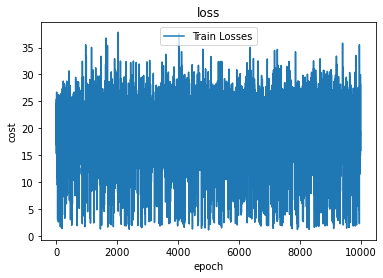

In [99]:
model = LogisticRegression(k,X_train.shape[1], "minibatch")
#model = LogisticRegression()
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
print(model.plot())

print(classification_report(y_test, yhat))

In [100]:
model = LogisticRegression(k,X_train.shape[1], "Win Win Phyo")
#model = LogisticRegression()
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
print(model.plot())

print(classification_report(y_test, yhat))

ValueError: 